<a href="https://colab.research.google.com/github/AnanthSundarrajan/will-the-customer-accept-a-coupon/blob/main/Customer_coupon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [168]:
data = pd.read_csv('/data/coupons.csv')

In [169]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [170]:
# Check number of rows and columns
data.shape

(12684, 26)

In [171]:
#Identifying the columns that might have missing values
missing_values_all = data.isna().sum()
missing_values_all

,0
destination,0
passanger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0


3. Decide what to do about your missing data -- drop, replace, other...

In [172]:
#Step 3.1 Of the total 12,684 rows, the car column has 12,576 missing values. There is a high probability this column might not have relevant information and therefore it is best to drop this column.
data.drop('car', axis=1)

#Step 3.2 Replace missing values in "Bar" columns with mode
data['Bar'] = data['Bar'].fillna(data['Bar'].mode()[0])
data['Bar'].isna().sum()

#Step 3.3 Fix typo for "Passanger" column
data = data.rename(columns={'passanger': 'passenger'})


4. What proportion of the total observations chose to accept the coupon?



In [173]:
#calculating the portion of the observations that accepted the coupons by calculating the total number of observations and the total number of accepted coupons
total_observations = len(data)
print('Total Observations = ',total_observations)
total_accepted = data['Y'].sum()
print('Total Accepted = ',total_accepted)
acceptance_proportion = (total_accepted / total_observations)*100
print(f'Acceptance Proportion = {acceptance_proportion:.2f}%')

Total Observations =  12684
Total Accepted =  7210
Acceptance Proportion = 56.84%


5. Use a bar plot to visualize the `coupon` column.

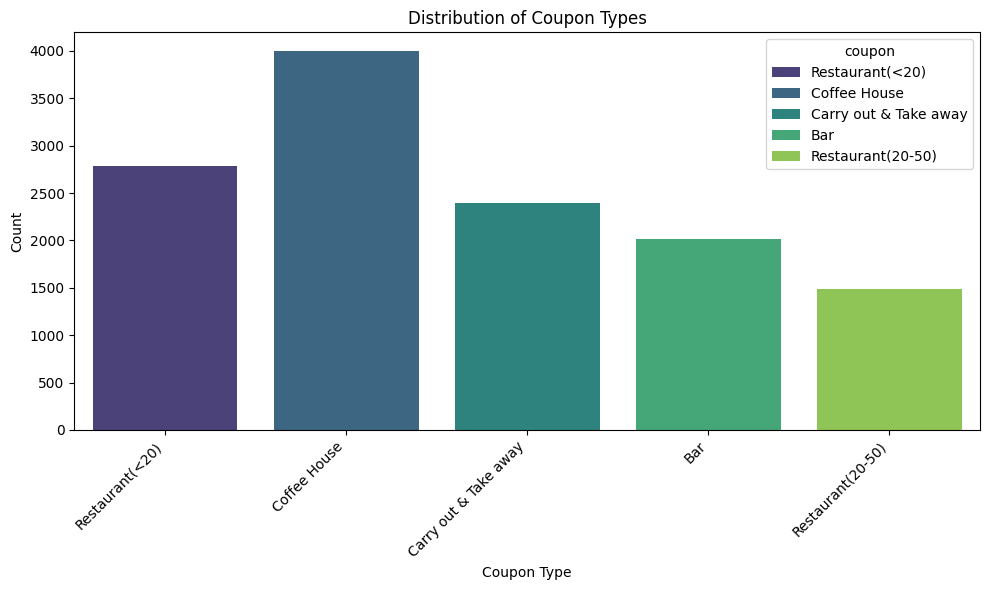

In [174]:
#Creating a bar plot using Seaborn library
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='coupon', hue='coupon', palette='viridis', legend=True)
plt.title('Distribution of Coupon Types')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

6. Use a histogram to visualize the temperature column.

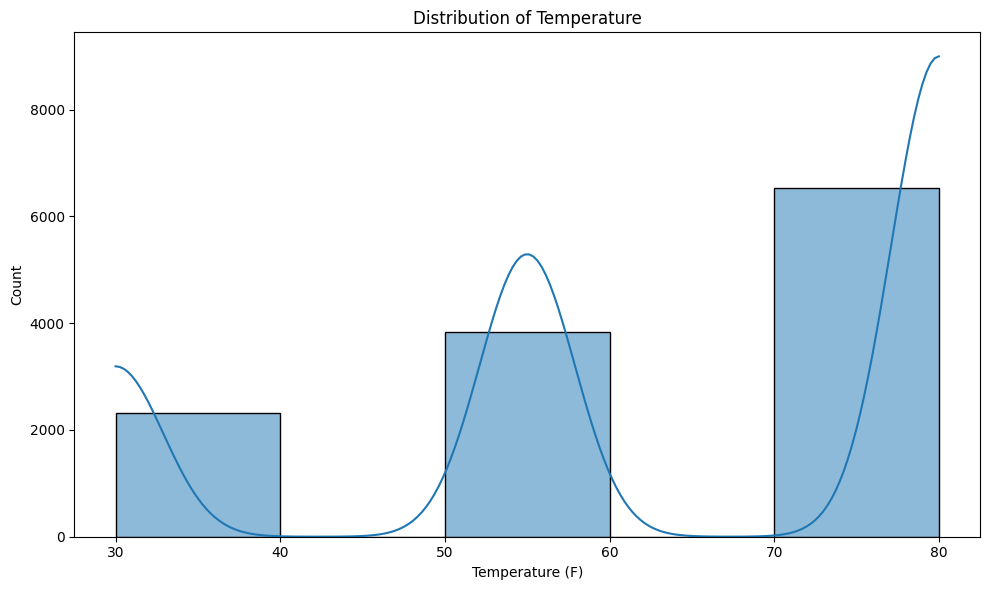

In [175]:
#creating a histogram of the data in the temperature column and plotting them using the seaborn library. Adding a Probability Density Function by setting "kde=true"
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='temperature', bins=5, kde=True)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (F)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [176]:
#Creating a new DataFrame for just the bar coupons
bar_coupons = data[data['coupon'] == 'Bar']
bar_coupons.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [177]:
# Remove NaN values and "Unknown" values from the 'Bar' column
bar_coupons1 = bar_coupons.dropna(subset=['Bar'])
bar_coupons_clean = bar_coupons1[bar_coupons1['Bar'] != 'Unknown']


#Calculating the portion of bar coupons that were accepted
total_bar_coupons = len(bar_coupons_clean)
total_bar_accepted = bar_coupons_clean['Y'].sum()
bar_acceptance_proportion = (total_bar_accepted / total_bar_coupons)*100

print(f"Total bar coupons: {total_bar_coupons}")
print(f"Bar coupons accepted: {total_bar_accepted}")
print(f"Proportion of bar coupons accepted: {bar_acceptance_proportion:.2f}'%'")

Total bar coupons: 2017
Bar coupons accepted: 827
Proportion of bar coupons accepted: 41.00'%'


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [178]:
# Check unique values for Bar column
data['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object)

In [179]:
accepted_bar_coupons_df = bar_coupons_clean.query('Y == 1')

# set bar visits list based on frquency of visit
bar_visits_3_or_less = ['1~3', 'less1', 'never']
bar_visits_4_or_more = ['4~8','gt8']

# Bar visits frequency comparison for <=3 and >=4 visits for accepted bar coupons
def bar_visits_frequency_comparison():
    bar_visits_3_or_less_acceptance = accepted_bar_coupons_df.query('Bar in @bar_visits_3_or_less and coupon == "Bar"')['Bar'].value_counts().sum()


    bar_visits_4_or_more_acceptance = accepted_bar_coupons_df.query('Bar in @bar_visits_4_or_more and coupon == "Bar"')['Bar'].value_counts().sum()


    accept_rate_visits_3_or_fewer = np.round((bar_visits_3_or_less_acceptance / total_bar_accepted) * 100, 2)
    accept_rate_visits_4_or_more = np.round((bar_visits_4_or_more_acceptance / total_bar_accepted) * 100, 2)
    visits_count_accept_rate_comp = np.round(accept_rate_visits_3_or_fewer / accept_rate_visits_4_or_more, 2)

    print(f'Acceptance rate for drivers who went to bar 3 or fewer:{accept_rate_visits_3_or_fewer}%')
    print(f'Acceptance rate for drivers who went to bar 4 or more:{accept_rate_visits_4_or_more}%')
    print(f'Acceptance rate for drivers who went to bar 3 or fewer accepted {visits_count_accept_rate_comp} times more than those who went to bar 4 times or more')

bar_visits_frequency_comparison()

Acceptance rate for drivers who went to bar 3 or fewer:81.5%
Acceptance rate for drivers who went to bar 4 or more:18.5%
Acceptance rate for drivers who went to bar 3 or fewer accepted 4.41 times more than those who went to bar 4 times or more


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [180]:
# Check unique values for column age
data['age'].unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [181]:
# Get acceptance count for visitor age more than 25 and visits more than once a month
age_list = ['21', 'below21']
bar_visits_count_list = ['1~3', 'gt8', '4~8']

def bar_visitor_acceptance_by_age():
    age25_plus_bar_visitors_count = accepted_bar_coupons_df.query('age not in @age_list and Bar in @bar_visits_count_list').groupby('Bar')['Bar'].value_counts().sum()
    # age25_plus_bar_visitors_count

    # Get acceptance count for other bar visitors
    other_bar_visitors_count = total_bar_accepted - age25_plus_bar_visitors_count
    # other_bar_visitors_count

    # Calculate acceptance rate for Age >= 25 and bar visits >= 1
    acceptance_rate_age_25plus = np.round((age25_plus_bar_visitors_count / total_bar_accepted) * 100, 2)
    print(f'Acceptance rate for Age >= 25 and bar visits >= 1: {acceptance_rate_age_25plus} %')

    # Calculate acceptance rate other bar visitors
    acceptance_rate_other_bar_visitors = np.round((other_bar_visitors_count / total_bar_accepted) * 100, 2)
    print(f'Acceptance rate for other bar visitors: {acceptance_rate_other_bar_visitors} %')

    # Acceptance rate comparison for 25+ visitors vs other bar visitors
    diff_to_other_visitos_age_25_plus = np.round(acceptance_rate_other_bar_visitors - acceptance_rate_age_25plus, 2)
    print(f'Difference in acceptance rate of other bar visitors to 25+ visitors: {diff_to_other_visitos_age_25_plus}')

bar_visitor_acceptance_by_age()

Acceptance rate for Age >= 25 and bar visits >= 1: 35.31 %
Acceptance rate for other bar visitors: 64.69 %
Difference in acceptance rate of other bar visitors to 25+ visitors: 29.38


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [182]:
# Understand unique values for column passenger
bar_coupons_clean['passenger'].unique()

array(['Kid(s)', 'Alone', 'Friend(s)', 'Partner'], dtype=object)

In [183]:
# Understand unique values for column occupation
bar_coupons_clean['occupation'].unique()

array(['Unemployed', 'Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Community & Social Services',
       'Office & Administrative Support', 'Construction & Extraction',
       'Legal', 'Retired', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
       'Farming Fishing & Forestry'], dtype=object)

In [184]:
# Get count of bar coupon acceptance for drivers who vists Bar multiple times, have no kids passenger and their occupation is not Farming, Fishing or forestry
def bar_coupons_acceptance_comparision_nokids_no_fff_to_others():
    no_kids_no_farming_count = accepted_bar_coupons_df.query('passenger != "Kid(s)" and Bar in @bar_visits_count_list and occupation != "Farming Fishing & Forestry"').groupby('Bar')['Bar'].value_counts().sum()
    print(f'Acceptance count for drivers with no kids and their occupation is not Farming, Fishing or forestry : {no_kids_no_farming_count}')

    # Acceptance rate for no kids and no farming multiple Bar visit
    no_kids_no_farming_accept_rate = np.round((no_kids_no_farming_count / total_bar_accepted) * 100, 2)
    print(f'Acceptance rate for drivers with no kids and their occupation is not Farming, Fishing or forestry: {no_kids_no_farming_accept_rate} %')

    # Get count for other Bar visitors
    others_of_no_kids_no_farming_count = total_bar_accepted - no_kids_no_farming_count
    print(f'Acceptance count for other drivers: {others_of_no_kids_no_farming_count}')

    others_of_no_kids_no_farming_accept_rate = np.round((others_of_no_kids_no_farming_count / total_bar_accepted) * 100, 2)
    print(f'Acceptance rate for other drivers: {others_of_no_kids_no_farming_accept_rate} %')

    proportion_others_to_no_kids_no_farming = np.round((others_of_no_kids_no_farming_accept_rate / no_kids_no_farming_accept_rate), 2)
    print(f'Acceptance proportion for above two groups: {proportion_others_to_no_kids_no_farming} %')

bar_coupons_acceptance_comparision_nokids_no_fff_to_others()

Acceptance count for drivers with no kids and their occupation is not Farming, Fishing or forestry : 393
Acceptance rate for drivers with no kids and their occupation is not Farming, Fishing or forestry: 47.52 %
Acceptance count for other drivers: 434
Acceptance rate for other drivers: 52.48 %
Acceptance proportion for above two groups: 1.1 %


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [185]:
#Step 6.1 Understand unique values of maritalStatus column
bar_coupons_clean['maritalStatus'].unique()

array(['Unmarried partner', 'Single', 'Married partner', 'Divorced',
       'Widowed'], dtype=object)

In [186]:
#Step 6.2 Understand unique values for "income" column
bar_coupons_clean['income'].unique()

array(['$37500 - $49999', '$62500 - $74999', '$12500 - $24999',
       '$75000 - $87499', '$50000 - $62499', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

In [187]:
#Step 6.3 Acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed
count_filtered_1 = accepted_bar_coupons_df[
    (accepted_bar_coupons_df['Bar'] != 'never') &
    (accepted_bar_coupons_df['maritalStatus'] != 'Widowed') &
    (accepted_bar_coupons_df['passenger'] != 'Kid(s)')
].shape[0]

# compared to total bar coupons accepted
multi_bar_visits_no_kids_no_widow_rate = (count_filtered_1 / total_bar_accepted) * 100

print(f'Acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed to other drivers: {multi_bar_visits_no_kids_no_widow_rate} %')

Acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed to other drivers: 76.54171704957679 %


In [188]:
#Step6.4 Acceptance rate for drivers who go to bars more than once a month and are under the age of 30
under_30_ages = ['21', '26', 'below21']
count_filtered_2 = accepted_bar_coupons_df[
    (accepted_bar_coupons_df['Bar'] != 'never') &
    (accepted_bar_coupons_df['age'].isin(under_30_ages))
].shape[0]

# compared to total bar coupons accepted
multi_bar_visits_less_than_30 = (count_filtered_2 / total_bar_accepted) * 100

print(f'Acceptance rate for drivers who go to bars more than once a month and are under the age of 30 to other drivers: {multi_bar_visits_less_than_30} %')

Acceptance rate for drivers who go to bars more than once a month and are under the age of 30 to other drivers: 43.0471584038694 %


In [189]:
#Step6.4 Acceptance rate for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K.
cheap_restaurant_freq_high = ['4~8', 'gt8']
income_less_than_50k = ['$37500 - $49999', '$12500 - $24999','$25000 - $37499','Less than $12500']
count_filtered_3 = accepted_bar_coupons_df[
    (accepted_bar_coupons_df['RestaurantLessThan20'].isin(cheap_restaurant_freq_high)) &
    (accepted_bar_coupons_df['income'].isin(income_less_than_50k))
].shape[0]

# compared to total bar coupons accepted
cheap_restaurant_income_less_50K = (count_filtered_3 / total_bar_accepted) * 100

print(f'Acceptance rate for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K to other drivers: {cheap_restaurant_income_less_50K} %')

Acceptance rate for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K to other drivers: 18.863361547763 %


In [190]:
#Step6.4 Combined acceptance rate using OR

# Condition 1: drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed
count_filtered_1_df = (
    (accepted_bar_coupons_df['Bar'] != 'never') &
    (accepted_bar_coupons_df['maritalStatus'] != 'Widowed') &
    (accepted_bar_coupons_df['passenger'] != 'Kid(s)')
)

# Condition 2: drivers who go to bars more than once a month and are under the age of 30
under_30_ages = ['21', '26', 'below21']
count_filtered_2_df = (
    (accepted_bar_coupons_df['Bar'] != 'never') &
    (accepted_bar_coupons_df['age'].isin(under_30_ages))
)

# Condition 3: drivers who go to cheap restaurants more than 4 times a month and income is less than 50K
cheap_restaurant_freq_high = ['4~8', 'gt8']
income_less_than_50k = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']
count_filtered_3_df = (
    (accepted_bar_coupons_df['RestaurantLessThan20'].isin(cheap_restaurant_freq_high)) &
    (accepted_bar_coupons_df['income'].isin(income_less_than_50k))
)

# Combine conditions using 'OR' logic
combined_conditions = count_filtered_1_df | count_filtered_2_df | count_filtered_2_df

# Count the number of people who satisfy the combined conditions
count_combined_accepted = accepted_bar_coupons_df[combined_conditions].shape[0]

# Calculate the combined acceptance rate
combined_acceptance_rate = (count_combined_accepted / total_bar_accepted) * 100

print(f"The number of people who satisfy at least one of the combined conditions is: {count_combined_accepted}")
print(f"The combined acceptance rate for these conditions is: {combined_acceptance_rate:.2f}%")



The number of people who satisfy at least one of the combined conditions is: 644
The combined acceptance rate for these conditions is: 77.87%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

1. The acceptance rate for the provided bar coupons was 41% of the total population, which is notably high compared to the average coupon acceptance rate of approximately 7% for the general U.S. population (https://www.opensend.com/post/promotional-redemption-rate-statistics-ecommerce).

2. Drivers who frequented a bar three or fewer times demonstrated an acceptance rate 4.4 times higher than those who visited a bar four or more times. This observation is consistent with the premise that individuals who visit bars less frequently are more receptive to coupons offering a potential discount.

3. Drivers under 25 years of age are twice as likely to accept coupons compared to those 25 years or older. This offers valuable market insight for bar owners, enabling them to better understand their consumer demographic and tailor services (e.g., music preferences, food offerings) to this segment.

4. The coupon acceptance rate was 47.52% for drivers who were not widowed, had no children passengers, and frequently visited bars.

5. Drivers under the age of 30 who visit bars multiple times a month accepted the coupon at a rate of 30.11%.

6. Drivers with an income below $50,000 who visit restaurants more than four times a month demonstrated a coupon acceptance rate of 18.86%.

7. A significant portion of the population attracted to these coupons is under the age of 30. This demographic information suggests opportunities for service refinement (e.g., updating music and food selections). Given that this younger cohort often has an income below $50,000, price may be a determining factor in their decisions, indicating that a more cost-effective menu could potentially attract a larger customer base.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

# Analysis of drivers who accepted a coupon from a "Coffee House"

In [191]:
#Step 1: Create a new DataFrame containing only observations related to 'Coffee House' coupons.
coffee_house_coupons = data[data['coupon'] == 'Coffee House']
coffee_house_coupons.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0


In [192]:
#Step 2: Calculated the total accepted coupons
total_coffee_coupons = len(coffee_house_coupons)
total_coffee_accepted = coffee_house_coupons['Y'].sum()
coffee_acceptance_proportion = (total_coffee_accepted / total_coffee_coupons) * 100

print(f"Total coffee house coupons: {total_coffee_coupons}")
print(f"Coffee house coupons accepted: {total_coffee_accepted}")
print(f"Proportion of coffee house coupons accepted: {coffee_acceptance_proportion:.2f}%")

Total coffee house coupons: 3996
Coffee house coupons accepted: 1995
Proportion of coffee house coupons accepted: 49.92%


Coffee House Coupon Acceptance Rate by Weather:
weather
Rainy    52.21
Snowy    43.23
Sunny    50.36
Name: Y, dtype: float64


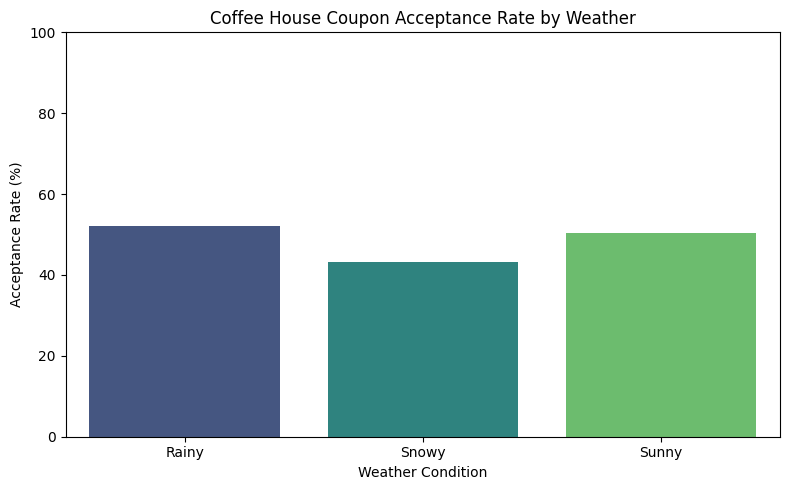

In [193]:
#Step 3: Analysis the acceptance of the coupons based on weather and visualize the results
weather_acceptance = coffee_house_coupons.groupby('weather')['Y'].mean() * 100
print('Coffee House Coupon Acceptance Rate by Weather:')
print(weather_acceptance.round(2))

plt.figure(figsize=(8, 5))
sns.barplot(x=weather_acceptance.index, y=weather_acceptance.values, hue=weather_acceptance.index, palette='viridis', legend=False)
plt.title('Coffee House Coupon Acceptance Rate by Weather')
plt.xlabel('Weather Condition')
plt.ylabel('Acceptance Rate (%)')
plt.ylim(0, 100) # Set y-axis limit to 100% for acceptance rates
plt.tight_layout()
plt.show()

Coffee House Coupon Acceptance Rate by Time:
time
10AM    64.07
10PM    42.42
2PM     54.79
6PM     41.26
7AM     44.58
Name: Y, dtype: float64


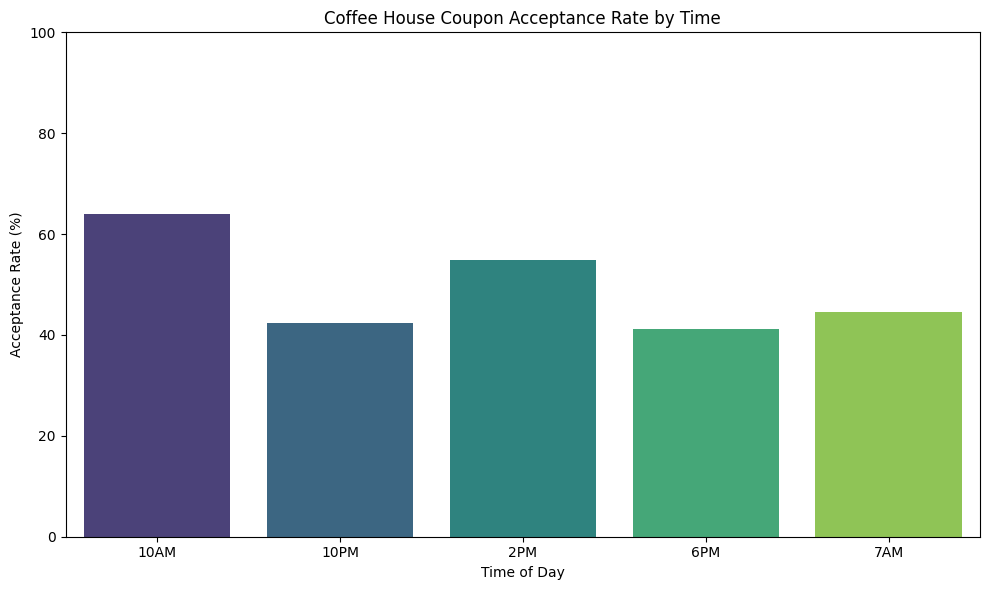

In [194]:
#Step 4: Analyse the acceptance of the coupons by time of day and visualize the results
time_acceptance = coffee_house_coupons.groupby('time')['Y'].mean() * 100
print('Coffee House Coupon Acceptance Rate by Time:')
print(time_acceptance.round(2))

plt.figure(figsize=(10, 6))
sns.barplot(x=time_acceptance.index, y=time_acceptance.values, hue=time_acceptance.index, palette='viridis', legend=False)
plt.title('Coffee House Coupon Acceptance Rate by Time')
plt.xlabel('Time of Day')
plt.ylabel('Acceptance Rate (%)')
plt.ylim(0, 100) # Set y-axis limit to 100% for acceptance rates
plt.tight_layout()
plt.show()

#Step 5 - Insights from Coffee House Coupon Acceptance

Based on the analysis of coffee house coupon acceptance rates across various factors, the following key observations and insights can be drawn:

1. Overall Acceptance Rate: The overall acceptance rate for coffee house coupons is approximately 49.92%.

2. Rainy weather shows the highest acceptance rate at 52.21%, suggesting that people are more inclined to accept coffee coupons when the weather is inclement.

3. Snowy weather showed the lowest acceptance rate (43.23%). Severe weather conditions might discourage people from making a detour, even for a coffee coupon.

4. 10 AM boasts the highest acceptance rate at 64.07%, indicating a strong preference for coffee coupons during mid-morning, likely aligned with morning breaks or commutes.

5. Coupons offered during evening hours, specifically 6 PM (41.26% acceptance) and 10 PM (42.42% acceptance), have significantly lower acceptance rates. This suggests that people are less inclined to consume coffee late in the day.

Next steps for owners:
1. Target Rainy Days and Mid-Morning: Marketing efforts for coffee house coupons would be most effective when distributed around 10 AM on rainy days.

2. To save cost, owners can reduce operations during late evening and snowy conditions to save